In [4]:
import pandas as pd
import numpy as np
import xgboost as xgb
import swifter
from ast import literal_eval
from tqdm import tqdm
import time

import optuna

import pandas as pd
import xgboost as xgb
import sklearn.datasets
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import confusion_matrix, mean_squared_error

rng = np.random.RandomState(31337)

# Sample example

In [37]:
(data, target) = sklearn.datasets.load_breast_cancer(return_X_y=True)
X = pd.DataFrame(data)
y = pd.Series(target)

In [40]:
# train_x, valid_x, train_y, valid_y = train_test_split(data, target, test_size=0.25)

kf = KFold(n_splits=2, shuffle=True, random_state=rng, )

In [54]:
for train_index, test_index in kf.split(X.index):
    pass
train_index

array([  1,   2,   3,   9,  11,  12,  13,  15,  17,  21,  22,  24,  26,
        27,  30,  33,  34,  35,  36,  37,  39,  40,  42,  43,  50,  51,
        52,  53,  55,  56,  58,  60,  61,  62,  65,  66,  73,  75,  76,
        79,  81,  82,  85,  86,  87,  88,  92,  93,  94,  99, 100, 101,
       103, 104, 107, 109, 110, 111, 113, 114, 115, 116, 117, 121, 123,
       126, 127, 133, 135, 137, 138, 140, 142, 145, 150, 151, 152, 153,
       156, 157, 159, 160, 163, 169, 170, 171, 174, 176, 179, 181, 182,
       185, 186, 190, 191, 193, 197, 198, 199, 200, 202, 203, 204, 206,
       209, 212, 215, 220, 223, 226, 228, 229, 233, 237, 239, 240, 241,
       244, 247, 250, 251, 252, 254, 255, 259, 265, 270, 271, 272, 273,
       274, 276, 278, 279, 280, 283, 284, 285, 286, 288, 289, 290, 291,
       292, 298, 300, 303, 305, 306, 322, 323, 324, 325, 326, 327, 329,
       334, 336, 338, 339, 340, 341, 342, 345, 346, 347, 348, 349, 352,
       353, 356, 357, 358, 360, 361, 362, 364, 365, 369, 370, 37

In [60]:
for train_index, test_index in kf.split(X):
    xgb_model = xgb.XGBClassifier(n_jobs=-1).fit(X.loc[train_index], y.iloc[train_index])
    predictions = xgb_model.predict(X.loc[test_index])
    actuals = y.loc[test_index]
    display(confusion_matrix(actuals, predictions))

array([[ 99,   3],
       [  8, 175]])

array([[100,  10],
       [  3, 171]])

In [62]:
sklearn.metrics.accuracy_score(actuals, predictions)

0.954225352112676

In [63]:
data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

# Working with our data

In [5]:
df_trevor = pd.read_csv("input-vectors.csv")
df_trevor

# cols_to_drop = ['team0', 'team1',
#              'losses', 'winp', 'cwins',
#              'closses', 'pts', 'fgm',
#              'fga', '3pm', '3pa',
#              'ftm', 'fta', 'orb',
#              'orbpg', 'drb', 'drbpg',
#              'reb', 'ast', 'stl',
#              'blk', 'tov', 'pf']

# df_trevor = df_trevor.drop(cols_to_drop, axis=1)

df_trevor['team0'] = df_trevor['team0'].astype('category')
df_trevor['team1'] = df_trevor['team1'].astype('category')

df_trevor

,pts,ptspg,fgm,fga,fgp,3pm,3pa,3pp,ftm,fta,...,wins,losses,winp,cwins,closses,cwinp,year,team0,team1,result
0,122.0,6.046,100.0,74.0,0.036,-22.0,-79.0,0.010,-56.0,-86.0,...,7.0,-8.0,0.238,6.0,-4.0,0.286,2003.0,Kentucky,IUPUI,0.0
1,-122.0,-6.046,-100.0,-74.0,-0.036,22.0,79.0,-0.010,56.0,86.0,...,-7.0,8.0,-0.238,-6.0,4.0,-0.286,2003.0,IUPUI,Kentucky,1.0
2,554.0,15.219,195.0,414.0,0.002,65.0,153.0,0.008,99.0,75.0,...,-3.0,4.0,-0.118,-1.0,5.0,-0.230,2003.0,Oregon,Utah,1.0
3,-554.0,-15.219,-195.0,-414.0,-0.002,-65.0,-153.0,-0.008,-99.0,-75.0,...,3.0,-4.0,0.118,1.0,-5.0,0.230,2003.0,Utah,Oregon,0.0
4,260.0,3.824,45.0,66.0,0.008,1.0,48.0,-0.029,169.0,226.0,...,4.0,-2.0,0.080,2.0,-4.0,0.250,2003.0,Wisconsin,Weber State,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2257,-168.0,-0.238,-97.0,-50.0,-0.036,-5.0,-1.0,-0.006,31.0,7.0,...,0.0,-2.0,0.050,-1.0,1.0,-0.050,2022.0,North Carolina,Duke,0.0
2258,275.0,8.334,162.0,167.0,0.044,-64.0,-171.0,-0.004,15.0,98.0,...,1.0,-1.0,0.030,-2.0,0.0,-0.022,2022.0,Kansas,Villanova,0.0
2259,-275.0,-8.334,-162.0,-167.0,-0.044,64.0,171.0,0.004,-15.0,-98.0,...,-1.0,1.0,-0.030,2.0,0.0,0.022,2022.0,Villanova,Kansas,1.0
2260,114.0,1.032,62.0,11.0,0.028,-30.0,-70.0,-0.007,20.0,67.0,...,0.0,1.0,-0.026,-1.0,-1.0,0.028,2022.0,Kansas,North Carolina,0.0


In [6]:
df_trevor.year.value_counts().sort_index()

2003.0    126
2004.0    126
2005.0    126
2006.0    126
2007.0    126
2008.0    126
2009.0    126
2010.0    126
2011.0    126
2012.0    126
2013.0    120
2014.0    126
2015.0    126
2016.0    126
2017.0    126
2018.0    126
2019.0    126
2022.0    126
Name: year, dtype: int64

In [7]:
## setup for Optuna

def objective(trial):
    param = {
        "verbosity": 0,
        "objective": "binary:logistic",
        # use exact for small dataset.
        "tree_method": "exact",
        # defines booster, gblinear for linear functions.
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        # L2 regularization weight.
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        # L1 regularization weight.
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        # sampling ratio for training data.
        "subsample": trial.suggest_float("subsample", 0.2, 1.0),
        # sampling according to each tree.
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
    }

    if param["booster"] in ["gbtree", "dart"]:
        # maximum depth of the tree, signifies complexity of the tree.
        param["max_depth"] = trial.suggest_int("max_depth", 3, 9, step=2)
        # minimum child weight, larger the term more conservative the tree.
        param["min_child_weight"] = trial.suggest_int("min_child_weight", 2, 10)
        param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
        # defines how selective algorithm is.
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)


    global for_year
    train_big = df_trevor.query(f'year < {for_year}').copy()
    test = df_trevor.query(f'year == {for_year}').copy()

    ## the code below is for training on folds but it's not needed

    # accuracies = []
    # kf = KFold(n_splits=4, shuffle=True, random_state=rng)
    # for train_index, holdout_index in kf.split(train_big):
    #     train = train_big.loc[train_index].copy()

    #     train_y = train['result']
    #     test_y = test['result']

    #     train.drop(columns=['result','year'], inplace=True, errors='ignore')
    #     mytest = test.drop(columns=['result','year'])

    #     dtrain = xgb.DMatrix(train, label=train_y, enable_categorical=True)
    #     dvalid = xgb.DMatrix(mytest, label=test_y, enable_categorical=True)


        

    #     bst = xgb.train(param, dtrain)
    #     preds = bst.predict(dvalid)
    #     pred_labels = np.rint(preds)
    #     accuracy = sklearn.metrics.accuracy_score(test_y, pred_labels, )
    #     accuracies.append(accuracy)
    # print(accuracies)

    # return sum(accuracies)/len(accuracies)

    train = train_big.copy()

    train_y = train['result']
    test_y = test['result']

    train.drop(columns=['result'], inplace=True, errors='ignore')
    mytest = test.drop(columns=['result'])

    dtrain = xgb.DMatrix(train, label=train_y, enable_categorical=True)
    dvalid = xgb.DMatrix(mytest, label=test_y, enable_categorical=True)

    bst = xgb.train(param, dtrain)
    preds = bst.predict(dvalid)
    pred_labels = np.rint(preds)
    return sklearn.metrics.accuracy_score(test_y, pred_labels, )


In [9]:
## Actually run the Optuna code

global for_year
for_year = 2022

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, timeout=600)

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2023-01-28 22:38:07,067] A new study created in memory with name: no-name-f2f2879a-a211-42ae-b514-8eca85892013
[I 2023-01-28 22:38:07,232] Trial 0 finished with value: 0.6904761904761905 and parameters: {'booster': 'gbtree', 'lambda': 0.636642337121207, 'alpha': 0.8585104951458864, 'subsample': 0.9438317189203682, 'colsample_bytree': 0.8531479946207259, 'max_depth': 7, 'min_child_weight': 8, 'eta': 4.585071625017341e-08, 'gamma': 1.6996105512368836e-06, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 0.6904761904761905.
[I 2023-01-28 22:38:07,310] Trial 1 finished with value: 0.753968253968254 and parameters: {'booster': 'dart', 'lambda': 0.874401802814396, 'alpha': 0.0009146738945596537, 'subsample': 0.40951119803337965, 'colsample_bytree': 0.5698435368542062, 'max_depth': 9, 'min_child_weight': 10, 'eta': 0.0009396795921727164, 'gamma': 1.435226763072637e-08, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 0.08435116980349253,

Number of finished trials:  100
Best trial:
  Value: 0.7619047619047619
  Params: 
    booster: dart
    lambda: 0.06955103981171336
    alpha: 0.6927998095196198
    subsample: 0.41694122956298296
    colsample_bytree: 0.572327505191115
    max_depth: 9
    min_child_weight: 9
    eta: 0.0018325846947988868
    gamma: 3.652883917328235e-08
    grow_policy: lossguide
    sample_type: uniform
    normalize_type: forest
    rate_drop: 0.0005987268328038135
    skip_drop: 1.5278114320647177e-08


In [25]:
## Load  the best model

global for_year
name = "Saint Peter's"

train = df_trevor.query(f'year < {for_year}')
test = df_trevor.query(f'year >= {for_year} and team0 == "{name}"')

train_y = train['result']
test_y = test['result']

train.drop(columns=['result'], inplace=True)
test.drop(columns=['result'], inplace=True)

dtrain = xgb.DMatrix(train, label=train_y, enable_categorical=True)
dvalid = xgb.DMatrix(test, label=test_y, enable_categorical=True)

bst = xgb.train(trial.params, dtrain)
preds = bst.predict(dvalid)
pred_labels = np.rint(preds)
sklearn.metrics.accuracy_score(test_y, pred_labels)

/var/folders/rr/ww1ckxfx54bftbc06_4b_7bc0000gn/T/ipykernel_20208/1050736137.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(columns=['result'], inplace=True)
/var/folders/rr/ww1ckxfx54bftbc06_4b_7bc0000gn/T/ipykernel_20208/1050736137.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(columns=['result'], inplace=True)


0.25

In [29]:
pd.DataFrame(zip(preds,pred_labels,test_y), columns=['percentages','labels','true'])

,percentages,labels,true
0,0.505452,1.0,0.0
1,0.508146,1.0,0.0
2,0.505189,1.0,0.0
3,0.507340,1.0,1.0


In [28]:
df_trevor.query(f'year >= {for_year} and team0 == "{name}"')

,pts,ptspg,fgm,fga,fgp,3pm,3pa,3pp,ftm,fta,...,wins,losses,winp,cwins,closses,cwinp,year,team0,team1,result
2181,-616.0,-12.588,-297.0,-431.0,-0.054,-27.0,-82.0,0.004,5.0,46.0,...,-3.0,0.0,-0.025,0.0,2.0,-0.078,2022.0,Saint Peter's,Kentucky,0.0
2189,-532.0,-12.445,-222.0,-299.0,-0.048,-82.0,-231.0,0.000,-6.0,1.0,...,-7.0,5.0,-0.173,-4.0,6.0,-0.300,2022.0,Saint Peter's,Murray State,0.0
2193,-707.0,-12.927,-253.0,-305.0,-0.062,-121.0,-261.0,-0.038,-80.0,-97.0,...,-4.0,0.0,-0.032,0.0,0.0,0.000,2022.0,Saint Peter's,Purdue,0.0
2195,-552.0,-13.071,-205.0,-373.0,-0.022,-97.0,-255.0,-0.009,-45.0,12.0,...,-5.0,3.0,-0.111,-1.0,1.0,-0.050,2022.0,Saint Peter's,North Carolina,1.0


In [230]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot: >

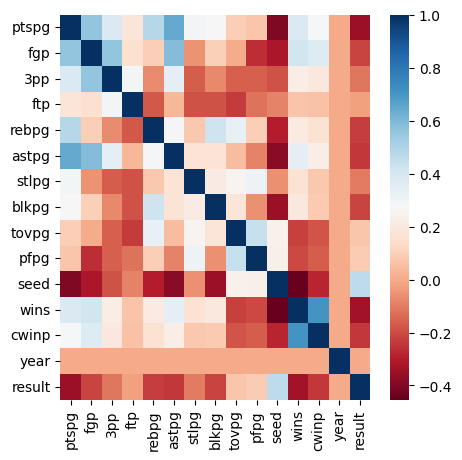

In [232]:
plt.figure(figsize=(5,5))
corr_matrix = df_trevor.corr()
sns.heatmap(corr_matrix, annot=False, cmap="RdBu")

In [241]:
pd.DataFrame(zip(preds,pred_labels,test_y), columns=['percentages','forecast','true'])

,percentages,forecast,true
0,-0.010118,-0.0,0.0
1,1.038264,1.0,1.0
2,0.961732,1.0,1.0
3,0.066414,0.0,0.0
4,0.061324,0.0,0.0
...,...,...,...
121,1.005356,1.0,1.0
122,0.064834,0.0,0.0
123,0.963312,1.0,1.0
124,0.108874,0.0,0.0


In [208]:
test.seed.value_counts()

 8.0     10
-8.0     10
 1.0      9
-1.0      9
 3.0      8
-3.0      8
-7.0      7
 7.0      7
-9.0      6
 9.0      6
-5.0      6
 5.0      6
-13.0     4
 13.0     4
-15.0     4
 15.0     4
-11.0     4
 11.0     4
 4.0      2
-4.0      2
-2.0      1
 2.0      1
-12.0     1
 12.0     1
-6.0      1
 6.0      1
Name: seed, dtype: int64

In [206]:
accuracy

1.0

In [192]:
trial.params

{'booster': 'gblinear',
 'lambda': 5.588715160131353e-08,
 'alpha': 2.891747461620777e-05,
 'subsample': 0.9533105633787862,
 'colsample_bytree': 0.49690727839201343}